In [1]:
# Import libraries

import pandas as pd
from matplotlib import pyplot as plt
import numpy as np
from datetime import datetime as dt
import seaborn as sns

In [2]:
df = pd.read_csv('NY_bikedata_sample.csv', index_col = 0)

C:\Users\walls\AppData\Local\Temp\ipykernel_15844\4092215430.py:1: DtypeWarning: Columns (5,7) have mixed types. Specify dtype option on import or set low_memory=False.
  df = pd.read_csv('NY_bikedata_sample.csv', index_col = 0)


In [3]:
df.head()

,rideable_type,started_at,ended_at,start_station_name,start_station_id,end_station_name,end_station_id,start_lat,start_lng,end_lat,end_lng,member_casual,date,avgTemp,rides_daily,_merge
ride_id,,,,,,,,,,,,,,,,
DA14E2F38543A9FF,classic_bike,2021-12-28 12:17:45.393,2022-01-01 11:07:06.792,Southpoint Park,6566.01,NaN,NaN,40.75370,-73.958650,NaN,NaN,casual,2021-12-28,NaN,1,both
23643AF38D9D91ED,classic_bike,2021-12-31 09:49:35.149,2022-01-01 10:49:15.878,W 47 St & 10 Ave,6824.07,NaN,NaN,40.76270,-73.993010,NaN,NaN,casual,2021-12-31,NaN,19,both
53B738C6594CC191,electric_bike,2021-12-31 23:51:45.918,2022-01-01 00:20:15.060,Broadway & W 61 St,7014.12,E 88 St & 1 Ave,7235.13,40.77003,-73.981970,40.778300,-73.948814,casual,2021-12-31,NaN,19,both
2065757132FE97C0,classic_bike,2021-12-31 23:58:39.100,2022-01-01 00:01:02.766,W 47 St & 10 Ave,6824.07,W 49 St & 8 Ave,6747.06,40.76270,-73.993010,40.762270,-73.987885,casual,2021-12-31,NaN,19,both
FD0283A8C2A6FAEF,electric_bike,2021-12-31 23:51:27.961,2022-01-01 00:16:04.623,Wythe Ave & Metropolitan Ave,5348.02,DeKalb Ave & Franklin Ave,4528.01,40.71689,-73.963196,40.690647,-73.957460,member,2021-12-31,NaN,19,both


In [4]:
df.shape

(1000000, 16)

In [5]:
df.dtypes

rideable_type          object
started_at             object
ended_at               object
start_station_name     object
start_station_id       object
end_station_name       object
end_station_id         object
start_lat             float64
start_lng             float64
end_lat               float64
end_lng               float64
member_casual          object
date                   object
avgTemp               float64
rides_daily             int64
_merge                 object
dtype: object

In [6]:
# Convert to float32 for memory, keep NaNs

df[['start_lat', 'start_lng', 'end_lat', 'end_lng', 'avgTemp']] = (
    df[['start_lat', 'start_lng', 'end_lat', 'end_lng', 'avgTemp']].astype('float32'))

In [7]:
df.dtypes

rideable_type          object
started_at             object
ended_at               object
start_station_name     object
start_station_id       object
end_station_name       object
end_station_id         object
start_lat             float32
start_lng             float32
end_lat               float32
end_lng               float32
member_casual          object
date                   object
avgTemp               float32
rides_daily             int64
_merge                 object
dtype: object

#### 3. Top 20 Starting Stations

In [8]:
# Find top 20 with groupby for stations name

df['value'] = 1
df_station = df.groupby('start_station_name')['value'].count().reset_index()

In [9]:
# Create top 20 df

top20 = df_station.nlargest(20, 'value')
top20

,start_station_name,value
1575,W 21 St & 6 Ave,4237
1705,West St & Chambers St,4162
493,Broadway & W 58 St,3759
8,1 Ave & E 68 St,3553
285,6 Ave & W 33 St,3482
459,Broadway & E 14 St,3331
1499,University Pl & E 14 St,3273
483,Broadway & W 25 St,3260
1591,W 31 St & 7 Ave,3172
461,Broadway & E 21 St,3115


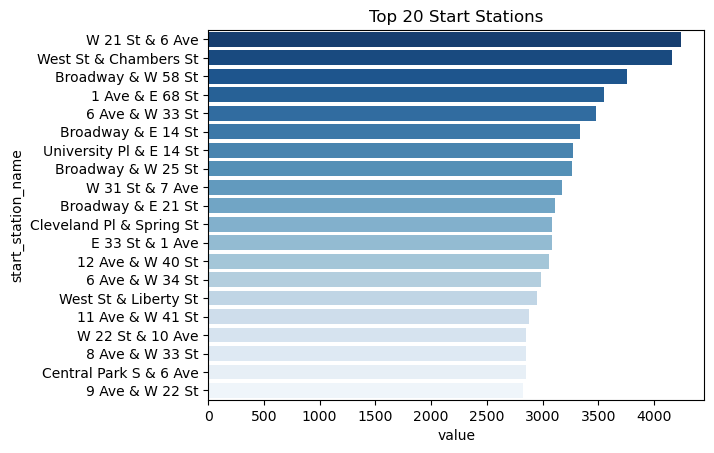

In [10]:
# Graph top20 with bar chart

sns.barplot(data = top20, x = 'value', y = 'start_station_name', palette=("Blues_r"))
plt.title("Top 20 Start Stations")
plt.show()

##### Observations: 

For coloring, setting a theme or palette did not override the default for sns to use it's own coloring (which resulted in a rainbow scheme).

I think we could add "n_colors = 20" to make sure seaborn has enough colors for the chart, but it seems like an extra step here... 

Passing the palette command through sns.barplot made sure seaborn used the correct coloring scheme (Blues_r - blue gradient)

#### 4. Dual Axis Chart

In [11]:
# Change date dtype

df['date'] = pd.to_datetime(df['date'], format = '%Y-%m-%d')

In [12]:
df.dtypes

rideable_type                 object
started_at                    object
ended_at                      object
start_station_name            object
start_station_id              object
end_station_name              object
end_station_id                object
start_lat                    float32
start_lng                    float32
end_lat                      float32
end_lng                      float32
member_casual                 object
date                  datetime64[ns]
avgTemp                      float32
rides_daily                    int64
_merge                        object
value                          int64
dtype: object

In [13]:
# Create new df with date as index

df_temp = df.set_index('date')

In [14]:
df_temp.head()

,rideable_type,started_at,ended_at,start_station_name,start_station_id,end_station_name,end_station_id,start_lat,start_lng,end_lat,end_lng,member_casual,avgTemp,rides_daily,_merge,value
date,,,,,,,,,,,,,,,,
2021-12-28,classic_bike,2021-12-28 12:17:45.393,2022-01-01 11:07:06.792,Southpoint Park,6566.01,NaN,NaN,40.753700,-73.958649,NaN,NaN,casual,NaN,1,both,1
2021-12-31,classic_bike,2021-12-31 09:49:35.149,2022-01-01 10:49:15.878,W 47 St & 10 Ave,6824.07,NaN,NaN,40.762699,-73.993011,NaN,NaN,casual,NaN,19,both,1
2021-12-31,electric_bike,2021-12-31 23:51:45.918,2022-01-01 00:20:15.060,Broadway & W 61 St,7014.12,E 88 St & 1 Ave,7235.13,40.770031,-73.981972,40.778301,-73.948814,casual,NaN,19,both,1
2021-12-31,classic_bike,2021-12-31 23:58:39.100,2022-01-01 00:01:02.766,W 47 St & 10 Ave,6824.07,W 49 St & 8 Ave,6747.06,40.762699,-73.993011,40.762272,-73.987885,casual,NaN,19,both,1
2021-12-31,electric_bike,2021-12-31 23:51:27.961,2022-01-01 00:16:04.623,Wythe Ave & Metropolitan Ave,5348.02,DeKalb Ave & Franklin Ave,4528.01,40.716888,-73.963196,40.690647,-73.957458,member,NaN,19,both,1


In [15]:
df_temp.shape

(1000000, 16)

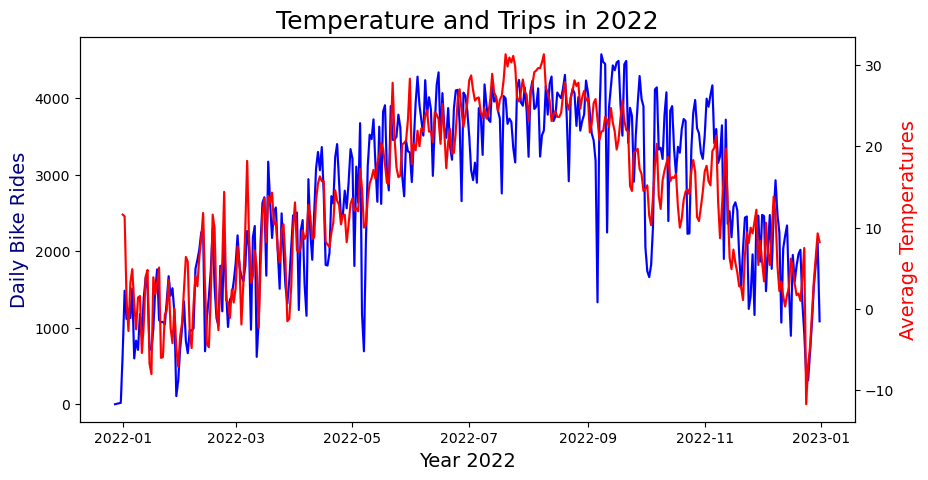

In [17]:
# Create line graph of avgTemp and daily trips with seaborn

fig,ax = plt.subplots(figsize=(10, 5))

sns.lineplot(data = df_temp['rides_daily'], color = "b")
ax.set_xlabel("Year 2022", fontsize = 14) # set x-axis label
ax.set_ylabel("Daily Bike Rides",color = "navy", fontsize = 14) # set y-axis label

# Create twin axis
ax2 = ax.twinx()
sns.lineplot(data = df_temp['avgTemp'], color="r", ax=ax2)
ax2.set_ylabel("Average Temperatures", color = "red",fontsize=14)
plt.title('Temperature and Trips in 2022', fontsize = 18)
plt.show()

#### 5. Box Plot

In [26]:
df.head()

,rideable_type,started_at,ended_at,start_station_name,start_station_id,end_station_name,end_station_id,start_lat,start_lng,end_lat,end_lng,member_casual,date,avgTemp,rides_daily,_merge,value
ride_id,,,,,,,,,,,,,,,,,
DA14E2F38543A9FF,classic_bike,2021-12-28 12:17:45.393,2022-01-01 11:07:06.792,Southpoint Park,6566.01,NaN,NaN,40.753700,-73.958649,NaN,NaN,casual,2021-12-28,NaN,1,both,1
23643AF38D9D91ED,classic_bike,2021-12-31 09:49:35.149,2022-01-01 10:49:15.878,W 47 St & 10 Ave,6824.07,NaN,NaN,40.762699,-73.993011,NaN,NaN,casual,2021-12-31,NaN,19,both,1
53B738C6594CC191,electric_bike,2021-12-31 23:51:45.918,2022-01-01 00:20:15.060,Broadway & W 61 St,7014.12,E 88 St & 1 Ave,7235.13,40.770031,-73.981972,40.778301,-73.948814,casual,2021-12-31,NaN,19,both,1
2065757132FE97C0,classic_bike,2021-12-31 23:58:39.100,2022-01-01 00:01:02.766,W 47 St & 10 Ave,6824.07,W 49 St & 8 Ave,6747.06,40.762699,-73.993011,40.762272,-73.987885,casual,2021-12-31,NaN,19,both,1
FD0283A8C2A6FAEF,electric_bike,2021-12-31 23:51:27.961,2022-01-01 00:16:04.623,Wythe Ave & Metropolitan Ave,5348.02,DeKalb Ave & Franklin Ave,4528.01,40.716888,-73.963196,40.690647,-73.957458,member,2021-12-31,NaN,19,both,1


In [27]:
df['member_casual'].unique()

array(['casual', 'member'], dtype=object)

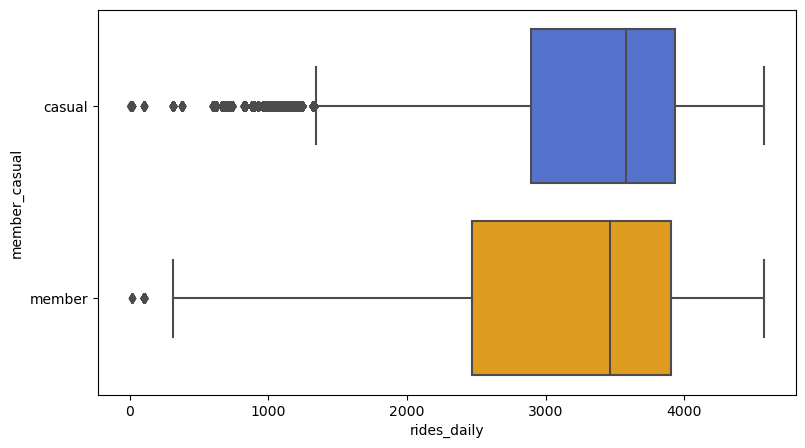

In [31]:
# Create box plot on daily ride totals and "member_casual" (member type)

plt.figure(figsize=(9,5))
sns.boxplot(x = 'rides_daily', y = 'member_casual', data = df, palette = {'member': 'orange', 'casual':"royalblue"})
plt.show()

##### Observation:

1. Many outliers in casual groups

2. Both whiskers are skewed -- Both casual and member groups have a longer bottom whisker. 
    a. There are few "low-active" members"

3. Both groups have a negative skew -- The median line is closer to the top of the box with a short top whisker.
    a. Both groups have an active amount of users with a high number of daily rides
    
4. Additional questions: What is causing the low number in rides?

#### 5. FacetGrid

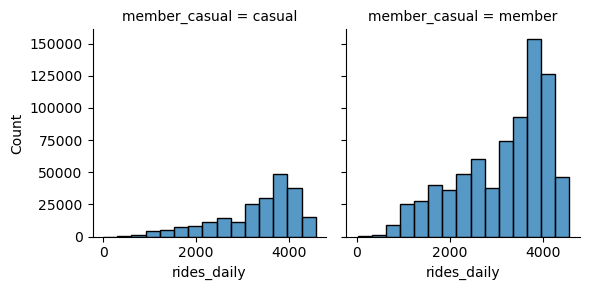

In [37]:
grid = sns.FacetGrid(df, col="member_casual")
grid.map(sns.histplot, "rides_daily", bins=15)
plt.show()

##### Observations:

1. There are more users with a membership,
2. Both groups, casual and member, have a high number of daily rides.

3. Additional questions: If casual users are riding around as much as users with a membership, what's keeping the casual group from becoming a member?